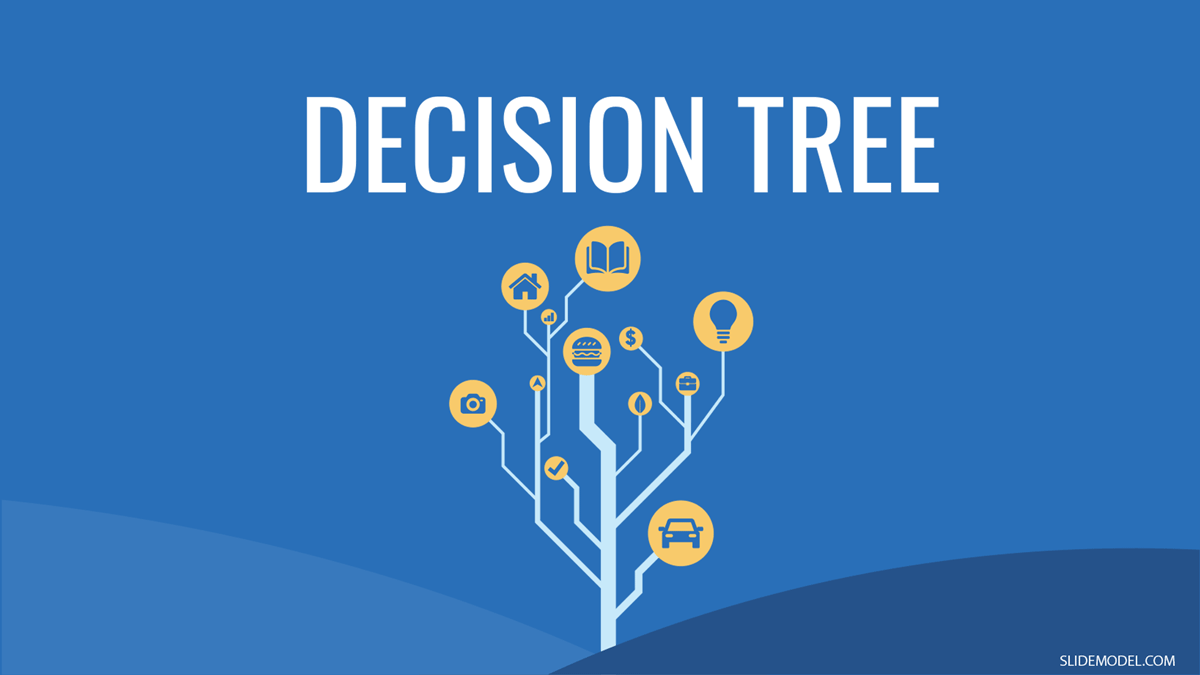

### Importing Libraries

In [1]:

import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Loading Dataset

In [2]:
df = pd.read_csv("Iris.csv")

### Understanding Dataset

In [3]:
display(df.shape,df.head())

(150, 6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
for i in df:
    print("Data type of {} is {} and it contain {} unique values".format(i,df[i].dtype,df[i].nunique()))
    print(end="\n\n")

Data type of Id is int64 and it contain 150 unique values


Data type of SepalLengthCm is float64 and it contain 35 unique values


Data type of SepalWidthCm is float64 and it contain 23 unique values


Data type of PetalLengthCm is float64 and it contain 43 unique values


Data type of PetalWidthCm is float64 and it contain 22 unique values


Data type of Species is object and it contain 3 unique values




In [5]:
# Removing Id 
df.drop("Id",axis=1,inplace=True)
## Inference
   # Id is different for each row because of which it will make no impact on the target variable. 

In [6]:
# Checking and Removing null values from the data set
for  i in df:
    if(df[i].isna().any()==True):
        if(df[i].dtype=="object"):
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if(df[i].skew()<0 or df[i].skew()>1):
                df[i]=df[i].fillna(df[i].median())
            else:
                df[i] = df[i].fillna(df[i].mean())
    else:
        print("There are no null values in",i)

There are no null values in SepalLengthCm
There are no null values in SepalWidthCm
There are no null values in PetalLengthCm
There are no null values in PetalWidthCm
There are no null values in Species


In [7]:
# Rechecking if there is any null values or not  in the data set.
print(df.isna().any())
print(end="\n\n")
print(df.isnull().sum())

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


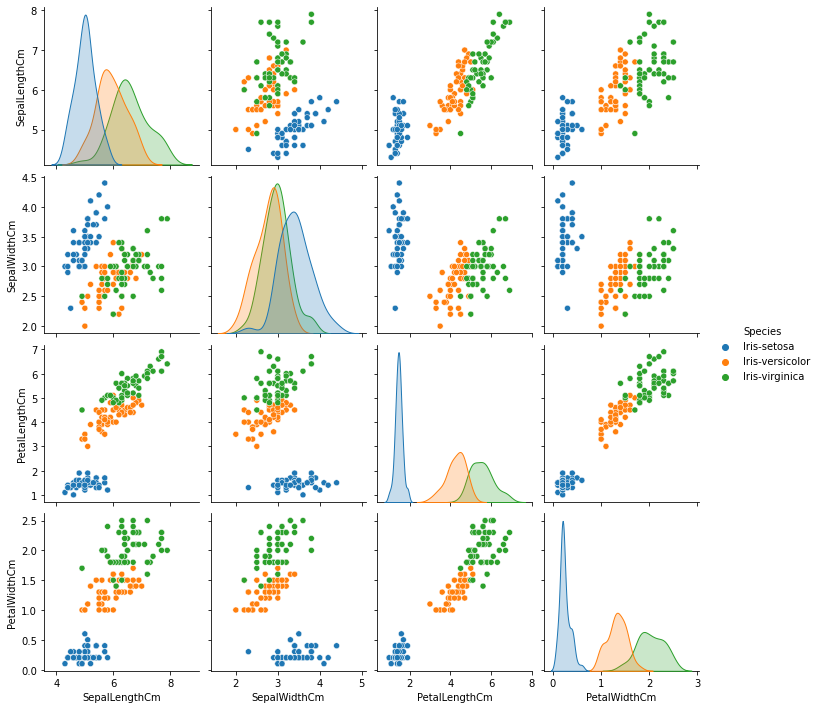

In [8]:
sns.pairplot(data=df,hue="Species")
plt.show()

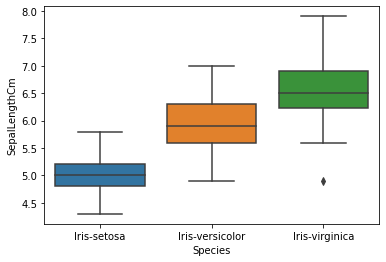

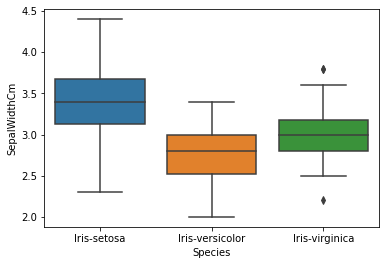

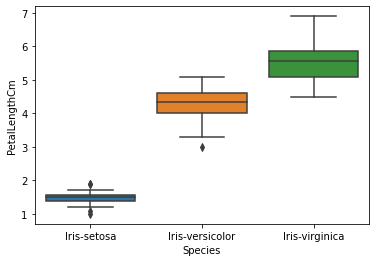

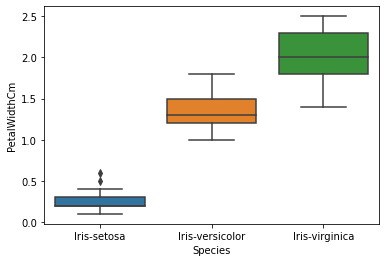

In [9]:
for i in df.drop("Species",axis=1):
    sns.boxplot(data=df , x = "Species" , y = df[i])
    plt.show()

In [10]:
# Label encoding 
label = LabelEncoder()
for i in df:
    if(df[i].nunique()<4 and df[i].dtype=="object"):
        df[i]=label.fit_transform(df[i])
    else:
        df[i]=df[i]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


None

<AxesSubplot:>

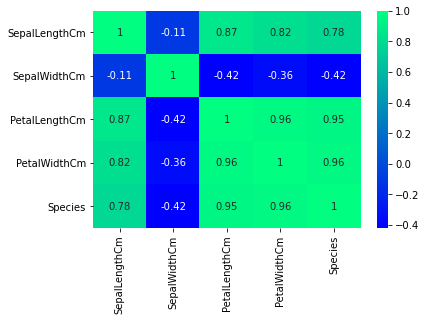

In [11]:
display(df.corr(),print(end="\n\n"),sns.heatmap(df.corr(),annot=True,cmap="winter"))
## Inference--
   # PetalLengthCm and PetalWidthCm are showing high correlation  with Species.

### Splitting Data into x and y variables

In [12]:
y = df["Species"]
x =df.drop("Species",axis=1)

### Splitting data into training and testing set 

In [13]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


SepalLengthCm


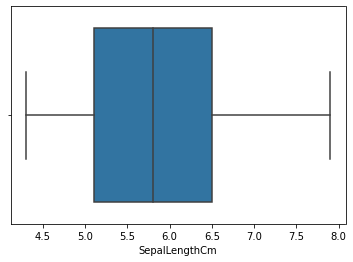

SepalWidthCm


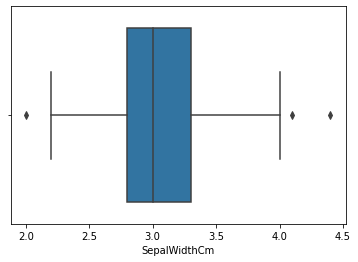

PetalLengthCm


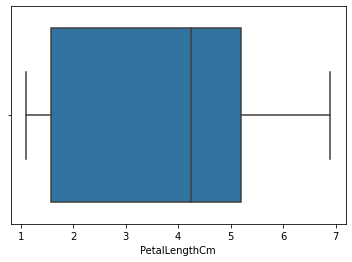

PetalWidthCm


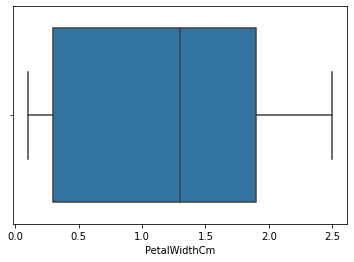

In [15]:
# Checking outliers in training dataset 
for i in x_train:
    print(i)
    sns.boxplot(data=x_train,x=i)
    plt.show()
## Inference--
     # Only SepalWidthCm contain outliers

### Treating Outliers

In [16]:
# Calculating 25th and 75th percentile value 
q1 = np.percentile(x_train["SepalWidthCm"],25)
q3 =np.percentile(x_train["SepalWidthCm"],75)
# calculating upper and lower limit value 
IQR = q3-q1
upper_limit = q3 +1.5*IQR
lower_limit = q1 - 1.5*IQR


In [17]:
print(" 25th percentile value of SepalWidthCm is",q1)
print("75th percentile value of SepalWidthCm is",q3)

 25th percentile value of SepalWidthCm is 2.8
75th percentile value of SepalWidthCm is 3.3


In [18]:
# Caping outlier 
x_train["SepalWidthCm"] = np.where(x_train["SepalWidthCm"]>upper_limit,upper_limit,np.where(x_train["SepalWidthCm"]<lower_limit,lower_limit,x_train["SepalWidthCm"]))

### Defining Decision Tree model

In [19]:
dtc = DecisionTreeClassifier()

In [20]:
#Finding best parameters for Decision Tree  model using Grid search cv 
params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 3, 5, 7, 9]}

In [21]:
grid = GridSearchCV(dtc, params, cv=10, n_jobs=-1, verbose=1)

In [22]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9]},
             verbose=1)

In [23]:
print("grid  best estimator are",grid.best_estimator_)
print(end="\n\n")
print("grid best parameters are",grid.best_params_)
print(end="\n\n")
print("Score",grid.best_score_)

grid  best estimator are DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)


grid best parameters are {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}


Score 0.9818181818181818


In [24]:
best = grid.best_estimator_
best 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

### Accuracy of Decision Tree model 

In [25]:
print("The accuracy of Decision Tree model is",accuracy_score(y_test,best.predict(x_test)))

The accuracy of Decision Tree model is 0.9736842105263158


In [26]:
print(classification_report(y_test,best.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Visualizing Decision Tree

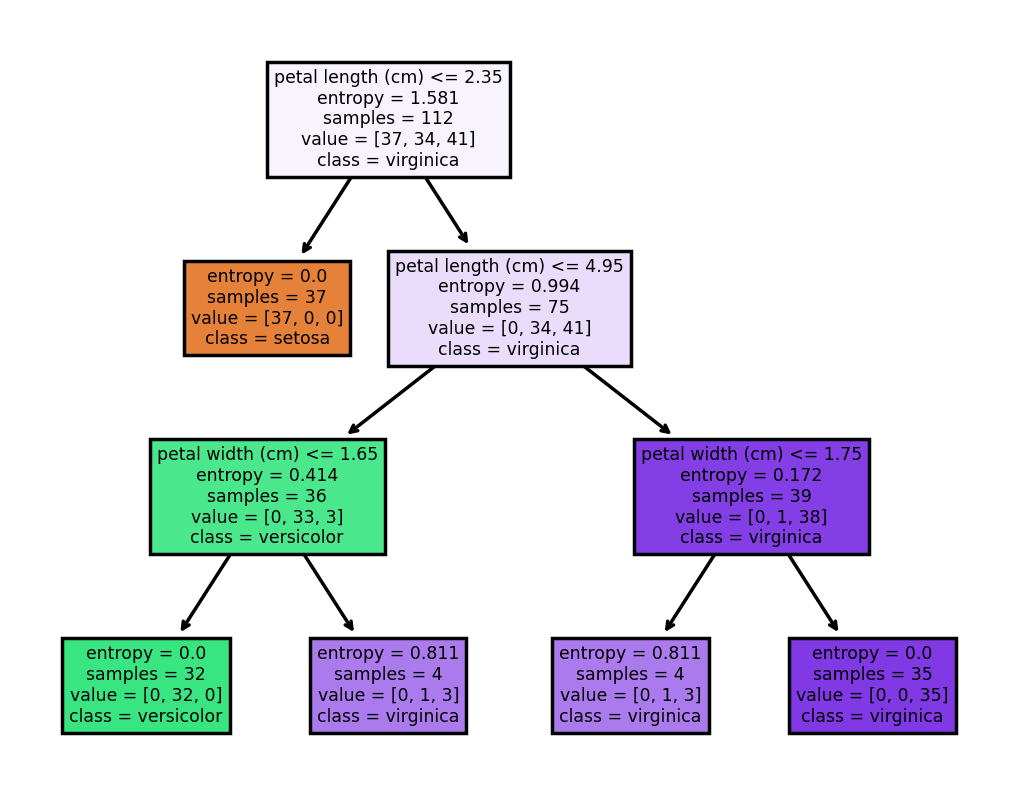

In [27]:
independent_features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target_feature=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=250)
tree.plot_tree(best,
               feature_names = independent_features, 
               class_names=target_feature,
               filled = True);